## Assignment no. 4

### Simple Linear Regression-1

#### Q1. Delivery_time -> Predict delivery time using sorting time

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#### Performing EDA and Data Visualization on Data 


In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data.shape

(21, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


##### Checking for null values

In [7]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
data.dropna()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#### Checking for duplicate values

In [9]:
data[data.duplicated()].shape

(0, 2)

In [10]:
data[data.duplicated()]

,Delivery Time,Sorting Time


##### Plotting data to check outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x10f73a476d0>,
 'caps': [<matplotlib.lines.Line2D at 0x10f73a98310>,
 'boxes': [<matplotlib.lines.Line2D at 0x10f73a89d10>],
 'medians': [<matplotlib.lines.Line2D at 0x10f73a99a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x10f73a9a490>],
 'means': []}

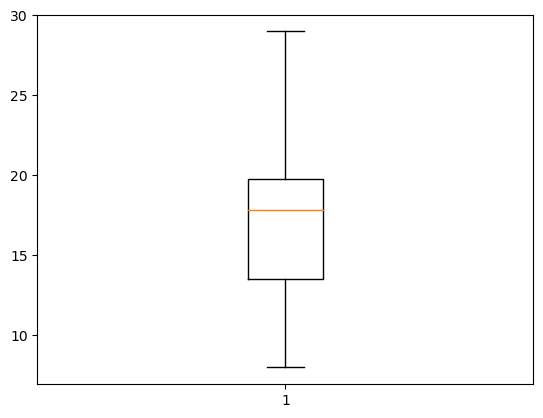

In [11]:
plt.boxplot(data['Delivery Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x10f73c9dc10>,
 'caps': [<matplotlib.lines.Line2D at 0x10f73c90bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x10f73c9d090>],
 'medians': [<matplotlib.lines.Line2D at 0x10f73ca8890>],
 'fliers': [<matplotlib.lines.Line2D at 0x10f73ca9290>],
 'means': []}

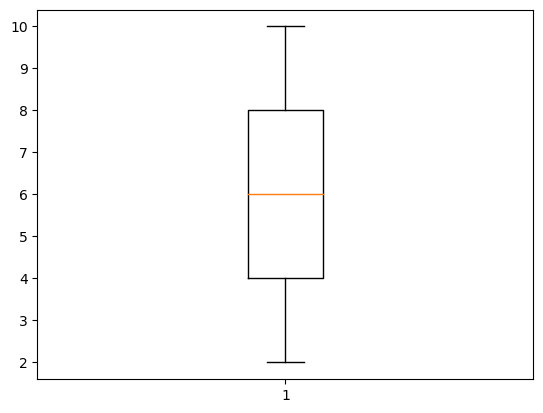

In [12]:

plt.boxplot(data['Sorting Time'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11420\2637709689.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

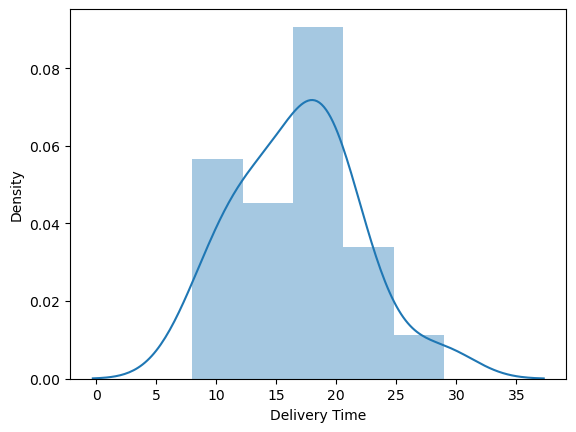

In [13]:

sns.distplot(data['Delivery Time'])



C:\Users\Administrator\AppData\Local\Temp\ipykernel_11420\3932129489.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

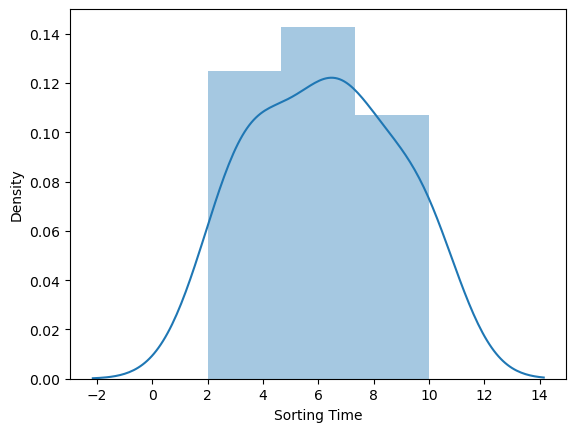

In [14]:
sns.distplot(data['Sorting Time'])

#### Renaming Columns


In [15]:
dataset=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#### Checking the Correlation between variables

In [16]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


#### Visualization of Correlation beteen x and y
regplot = regression plot

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

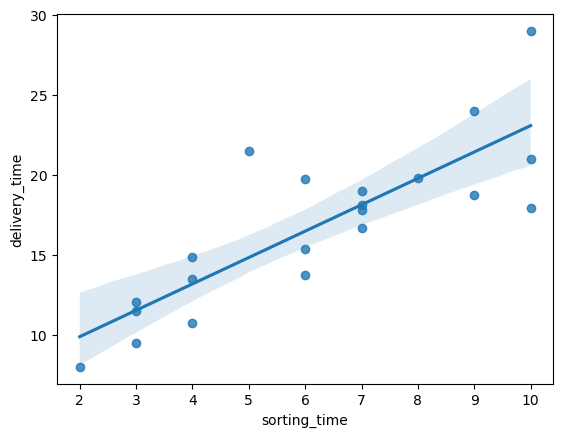

In [17]:

sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

#### 
As we can see above,
There is good correlation between the two variable.
The score is more than 0.8 which is a good sign

#### Model Building

In [18]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 13 Apr 2024   Prob (F-statistic):           3.98e-06
Time:                        18:07:49   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Model Testing

##### Finding Coefficient parameters

In [20]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

##### Finding tvalues and pvalues

In [21]:
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

#### Finding Rsquared Values

In [22]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

#### Model Predictions

##### Manual prediction for say sorting time

In [23]:
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

##### Automatic Prediction for say sorting time 5, 8

In [24]:
new_data=pd.Series([5,8])
new_data
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [25]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [27]:
predicted1 = pd.DataFrame()
predicted1['sorting_time'] = dataset.sorting_time
predicted1['delivery_time'] = dataset.delivery_time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.sorting_time))
predicted1

,sorting_time,delivery_time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
